# Communicating Data Findings  [Ford GoBike System](https://s3.amazonaws.com/fordgobike-data/index.html)
 
## by  Aparna 


<a id='intro'></a>
### Introduction

Ford GoBike is a regional public bicycle sharing system in the San Francisco Bay Area, California. Over the past decade, bicycle-sharing systems have been growing in number and popularity in cities across the world. Bicycle-sharing systems allow users to rent bicycles for short trips, typically 30 minutes or less.

In this project, I will perform an exploratory analysis on data provided by Ford GoBike service provider.

This document explores the Ford GoBike's trip data.In this project, we will focus on the record of individual trips taken in from January 2018 to April 2019.

Ford GoBike Data: https://s3.amazonaws.com/fordgobike-data/index.html.

In [1]:
# import all packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import math
import calendar
import os
import glob
from requests import get
from os import makedirs, listdir 
import matplotlib.ticker as tick
from io import BytesIO
from zipfile import ZipFile
import warnings
warnings.filterwarnings('ignore')
from IPython.display import Image

%matplotlib inline

In [2]:
# create a directory for storing all the datasets
dir_saved = 'fordbike_data'
if not os.path.exists(dir_saved):
    os.makedirs(dir_saved)

In [3]:
# store the all the downloaded dataset in a directory created above
# dataset for the year 2018 (Jan-Dec)
urls = []
    
for month in range(1,13):
    month_string = str(month)
    month_leading_zero = month_string.zfill(2)
    
    ford_data_url = 'https://s3.amazonaws.com/fordgobike-data/2018' + month_leading_zero + '-fordgobike-tripdata.csv.zip'
    urls.append(ford_data_url)
    print('2018 -',month)
    
for month in range(1,5):
    month_string = str(month)
    month_leading_zero = month_string.zfill(2)
    
    ford_data_url = 'https://s3.amazonaws.com/fordgobike-data/2019' + month_leading_zero + '-fordgobike-tripdata.csv.zip'
    urls.append(ford_data_url)
    print('2019 -',month)
    

2018 - 1
2018 - 2
2018 - 3
2018 - 4
2018 - 5
2018 - 6
2018 - 7
2018 - 8
2018 - 9
2018 - 10
2018 - 11
2018 - 12
2019 - 1
2019 - 2
2019 - 3
2019 - 4


In [4]:
# get csv file from the zip file 
for url in urls:
    response = get(url)      
    unzipped_file = ZipFile(BytesIO(response.content))
    unzipped_file.extractall(dir_saved)

In [5]:
# Combine all the CSVs into One DataFrame 
combined_csv = []
for trip_data in glob.glob('fordbike_data/*.csv'):
    trips = pd.read_csv(trip_data)
    if trips.shape[1]<10:
        trips = pd.read_csv(trip_data, sep=';')
    combined_csv.append(trips)

df = pd.concat(combined_csv)

In [6]:
df.to_csv('fordgobike.csv')

In [7]:
# Create a copy of original dataframe 
clean_df = df.copy()

In [8]:
# set date to timestamps
clean_df.start_time = pd.to_datetime(clean_df.start_time)
# set user type, gender 
clean_df.user_type = clean_df.user_type.astype('category')
clean_df.member_gender = clean_df.member_gender.astype('category')
# Extracting Start time 
clean_df['start_time_year_month']=clean_df['start_time'].map(lambda x: x.strftime('%Y-%m')) # year-month format

### Question 1 : Which gender uses the Ford GoBike service more?

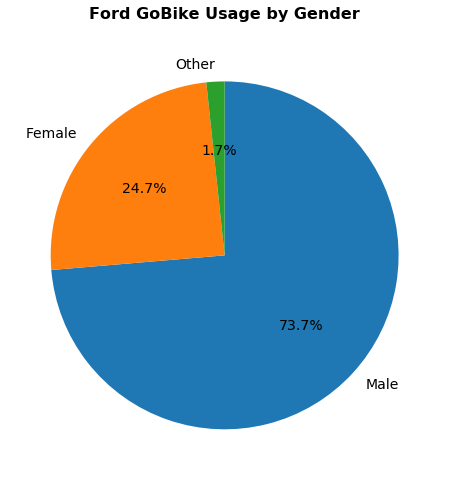

In [9]:
#Pie chart for Gender usage of the Ford GoBike service
plt.figure(figsize=(11,8))
plt.title('Ford GoBike Usage by Gender',fontsize=16, y=1.03,fontweight='semibold')
plt.pie(clean_df['member_gender'].value_counts(),labels = clean_df['member_gender'].value_counts().index,
        startangle = 90,autopct='%1.1f%%',counterclock=False,textprops={'fontsize': 14});

### Observation
##### Most bike riders are Males.

### Question 2 : Which user type uses Ford GoBike service more?

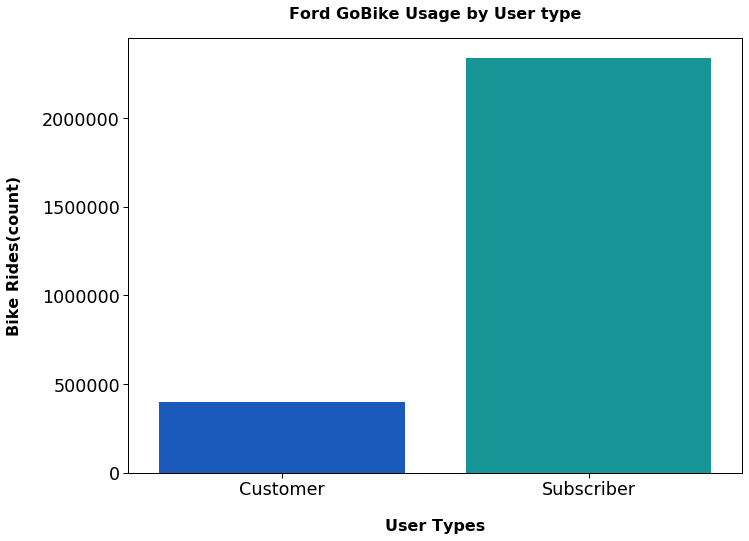

In [10]:
##Bar chart for User Type usage of the Ford Gobike service
plt.figure(figsize=(11,8))
sns.set_context("paper", font_scale=2) 
sns.countplot(x='user_type',palette='winter', data=clean_df.sort_values(by='user_type'))
plt.title('Ford GoBike Usage by User type', fontsize=16, y=1.03,fontweight='bold')
plt.xlabel('User Types', labelpad=20, fontweight='bold',fontsize=16)
plt.ylabel('Bike Rides(count)', labelpad=20, fontweight='bold',fontsize=16);

### Observation
#####  Ford GoBike is most used by Subscribers.

### Exploring the trends of Monthly usage of Ford GoBike service vs.Gender

<Figure size 792x576 with 0 Axes>

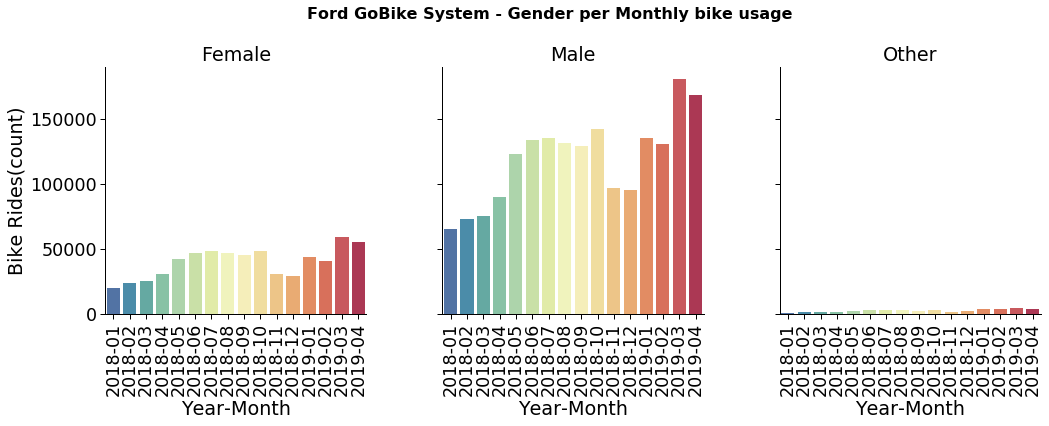

In [11]:
#Bar charts to check gender wise monthly usage of Ford GoBike 
plt.figure(figsize=(11,8))
sns.set_context("paper", font_scale=2) 
g = sns.catplot(data=clean_df, x='start_time_year_month', col="member_gender", kind='count', sharey = True, palette='Spectral_r');
g.set_axis_labels("Year-Month", "Bike Rides(count)");
g.set_titles("{col_name}");
g.fig.suptitle('Ford GoBike System - Gender per Monthly bike usage', y=1.05, fontsize=16, fontweight='bold');
g.set_xticklabels(rotation=90);

### Observation
The monthly trends showing that the males are mostly used the Ford GoBike service compared to females and other category.

### Explore the trends Monthly usage of Ford GoBike service vs. User type

<Figure size 792x576 with 0 Axes>

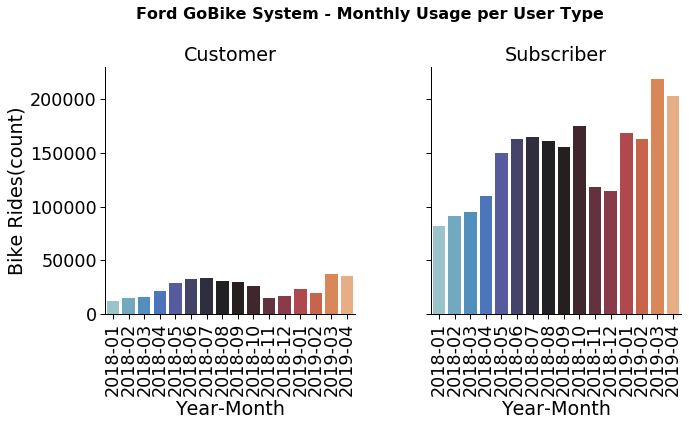

In [12]:
#Bar charts to check monthly bike usage per user_type
plt.figure(figsize=(11,8))
sns.set_context("paper", font_scale=2) 
g = sns.catplot(data=clean_df, x='start_time_year_month', col="user_type", kind='count', sharey = True, palette ='icefire' );
g.set_axis_labels("Year-Month", "Bike Rides(count)");
g.set_titles("{col_name}");
g.fig.suptitle('Ford GoBike System - Monthly Usage per User Type', y=1.05, fontsize=16, fontweight='bold');
g.set_xticklabels(rotation=90);

### Observation
Both the user types have same trends for month wise usage of bikes.Subscribers are take most monthly rides.2019-March and 2019-April being the months were most of the rides are taken.

### Exploring The Ford GoBike usage trends for all user type per gender wise

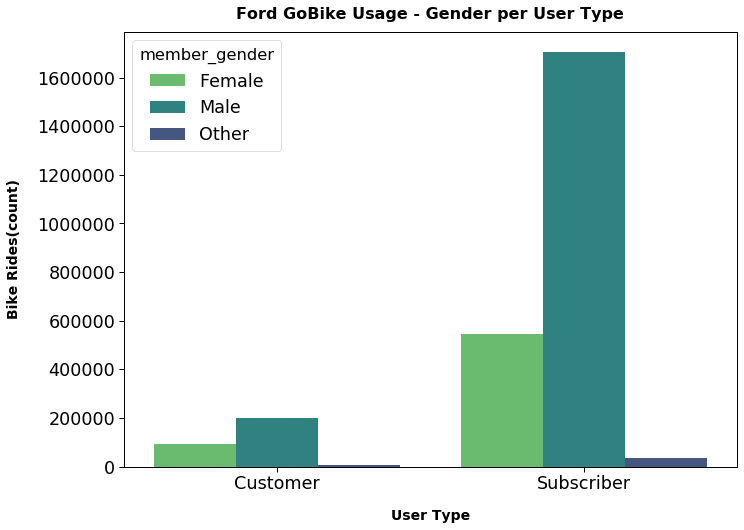

In [13]:
# The Ford GoBike usage trends for all user_type per gender wise
plt.figure(figsize=(11,8))
sns.set_context("paper", font_scale=2) 
ax = sns.countplot(data = clean_df, x = 'user_type', hue = 'member_gender',palette= 'viridis_r')
plt.title('Ford GoBike Usage - Gender per User Type', fontsize=16, y=1.015,fontweight='bold')
plt.xlabel('User Type', labelpad=16, fontweight='bold',fontsize=14)
plt.ylabel('Bike Rides(count)', labelpad=16,fontweight='bold',fontsize=14);

### Observation
- Both the user types had majority of users are Males.
- Subscribers using the service more compared to customers.

### Visulaizing monthly usage of Ford GoBike System per user type and gender

<Figure size 792x576 with 0 Axes>

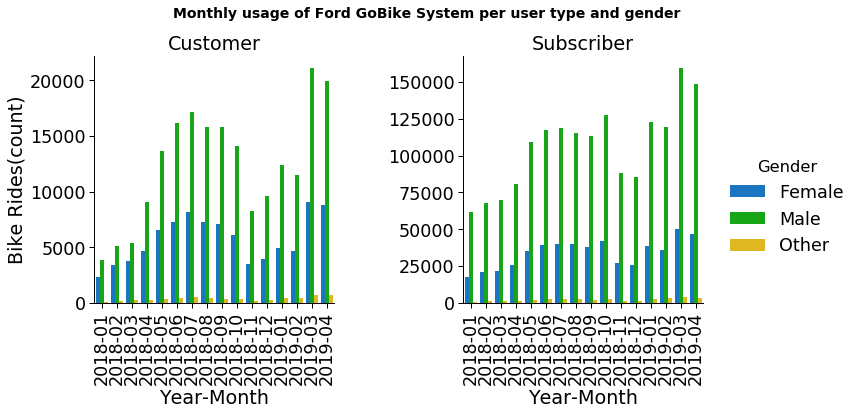

In [14]:
# plot monthly trends of  Ford GoBike System per user type and gender
plt.figure(figsize=(11,8))
sns.set_context("paper", font_scale=2) 
g = sns.catplot(data=clean_df, x='start_time_year_month',palette='nipy_spectral', col="user_type", hue="member_gender", kind='count', sharey = False)
g.set_axis_labels("Year-Month", "Bike Rides(count)")
g._legend.set_title('Gender')
g.set_titles("{col_name}")
g.fig.suptitle('Monthly usage of Ford GoBike System per user type and gender', y=1.02, fontsize=14, fontweight='bold');
g.set_xticklabels(rotation=90);

### Observation
- User type Subscriber uses the service more in the intial months of the year 2018  whereas the user type customer use the service more in the months April to September in the year 2018.
- From october 2018 to April 2019 Subscribers are used the service more than Customers
- Gender - Males uses the service more for both user-types.